> **University of Pisa** \
> **M.Sc. Computer Science, Artificial Intelligence** \
> **Continual learning 2022/23** \
> **Authors**
* Andrea Iommi - a.iommi2@studenti.unipi.it

# Memory Replay GANs
# Learning to generate images from new categories without forgetting
#### [(original paper)](https://proceedings.neurips.cc/paper/2018/hash/a57e8915461b83adefb011530b711704-Abstract.html)
### Notebooks
*   Classical acGAN in offline settings
*   **Classical acGAN in online settings**
*   acGAN with join retrain
*   acGAN with replay alignment


In [2]:
import torch
from Trainer import Trainer
from Utils import custom_mnist
from Plot_functions import generate_classes, plot_history

In [3]:
config = dict(
    device="cuda" if torch.cuda.is_available() else "cpu",
    num_classes=10,
    img_size=32,
    channels=1,
    n_epochs=[100,150],
    batch_size=32,
    embedding=100, # latent dimension of embedding
    lr_g=7e-5, # Learning rate for generator 7e-5
    lr_d=7e-5 # Learning rate for discriminator
)

## Classical acGAN in online settings (training)
We create a classical acGAN in online setting, this time instead we build multiple experiences. More precisely, we have 2 experience: the first one contains the number 0-4, the second one 5-9. The model at each experience **see only the current digits** and this leads to a **Catastrophic forgetting**.

## 2 Experiences

In [ ]:
experiences = [[0,1,2,3,4],[5,6,7,8,9]] # list of experiences
exp_generator = custom_mnist(experiences = experiences)
trainer = Trainer(config=config)
history = trainer.fit_classic(experiences=exp_generator)
# we removed all training logs

## Loss functions and Accuracy
The charts below represent the *loss function* for both Generator and Discriminator. Since we have multiple experiences, the loss functions are assumed a strange behavior. In correspondence of each experience, we can notice 2 visible spikes. This is due to the fact that in the first experience **the model learns the current digits, when the experience changes, it learns the new ones and forget the previous ones.** However, the accuracy seems to be high but in really it is performed only with the current digit and not also with the previous.

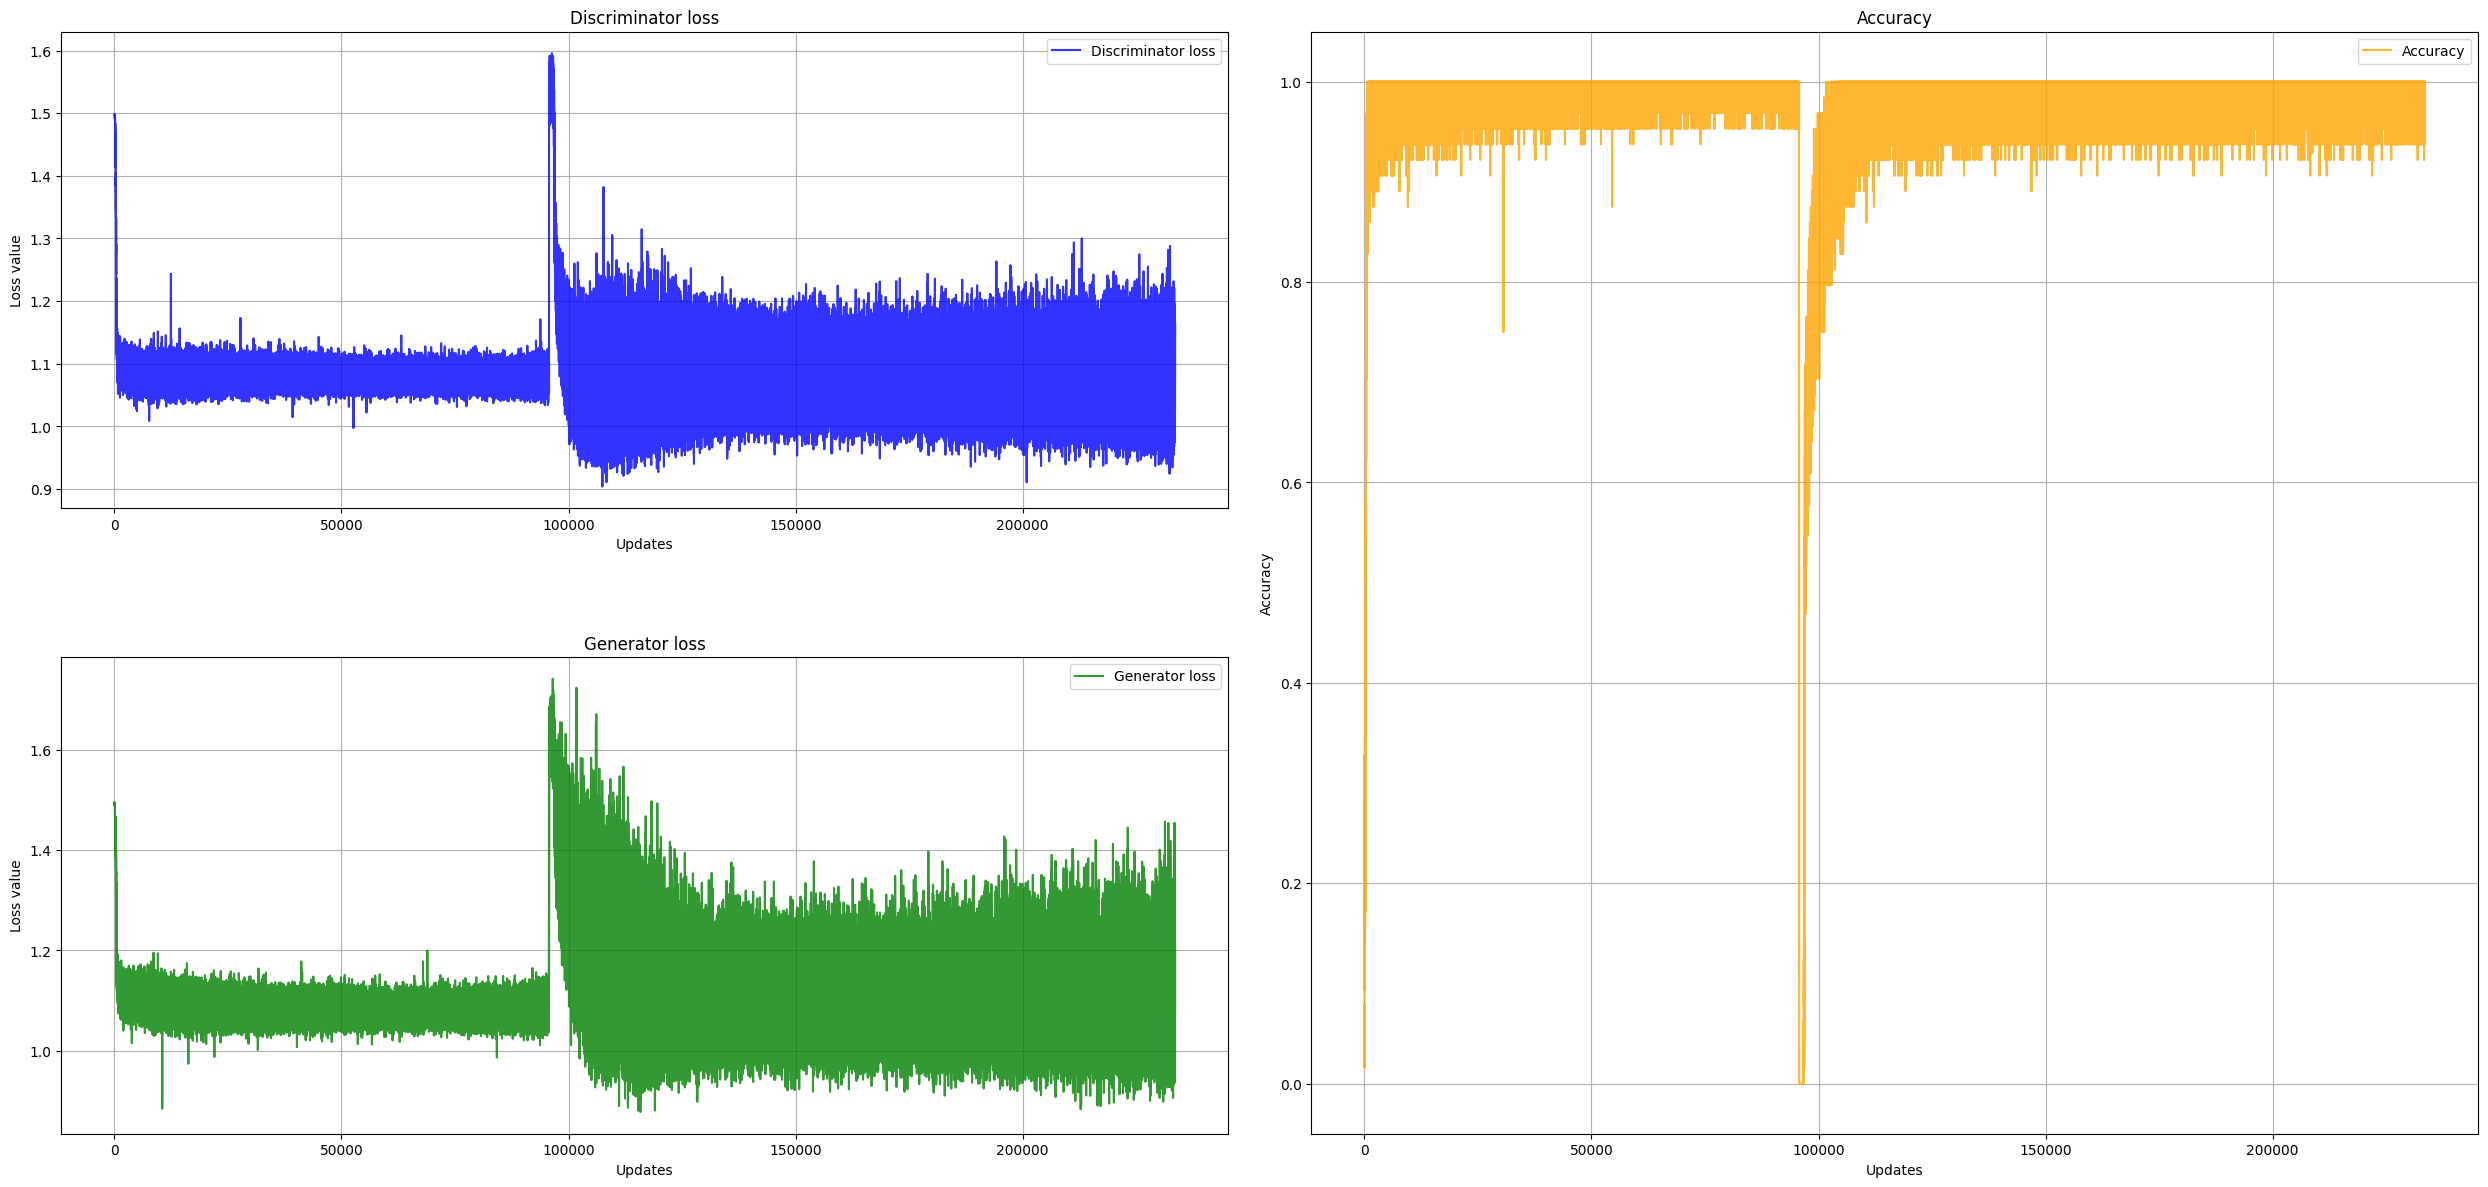

In [5]:
plot_history(history)

## Evaluate the architecture

As we can see, the model is able to generate quite well only the last 5 digits that correspond to the last experience.
Even if the model has seen previous digits thought the experiences, it is no more able to generate them, cause **Catastrophic forgetting**.

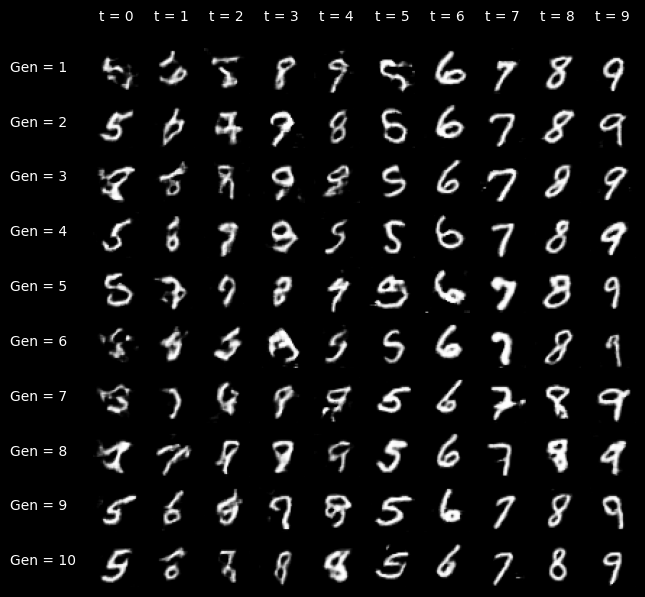

In [6]:
generate_classes(trainer.generator, config["num_classes"], rows=10, device=config["device"])

## 10 Experiences

In [ ]:
config["n_epochs"] = [100,100,100,100,100,100,100,100,100,100]
experiences = [[0],[1],[2],[3],[4],[5],[6],[7],[8],[9]] # list of experiences
exp_generator = custom_mnist(experiences = experiences)
trainer = Trainer(config=config)
history = trainer.fit_classic(experiences=exp_generator)
# we removed all training logs

## Loss functions and Accuracy

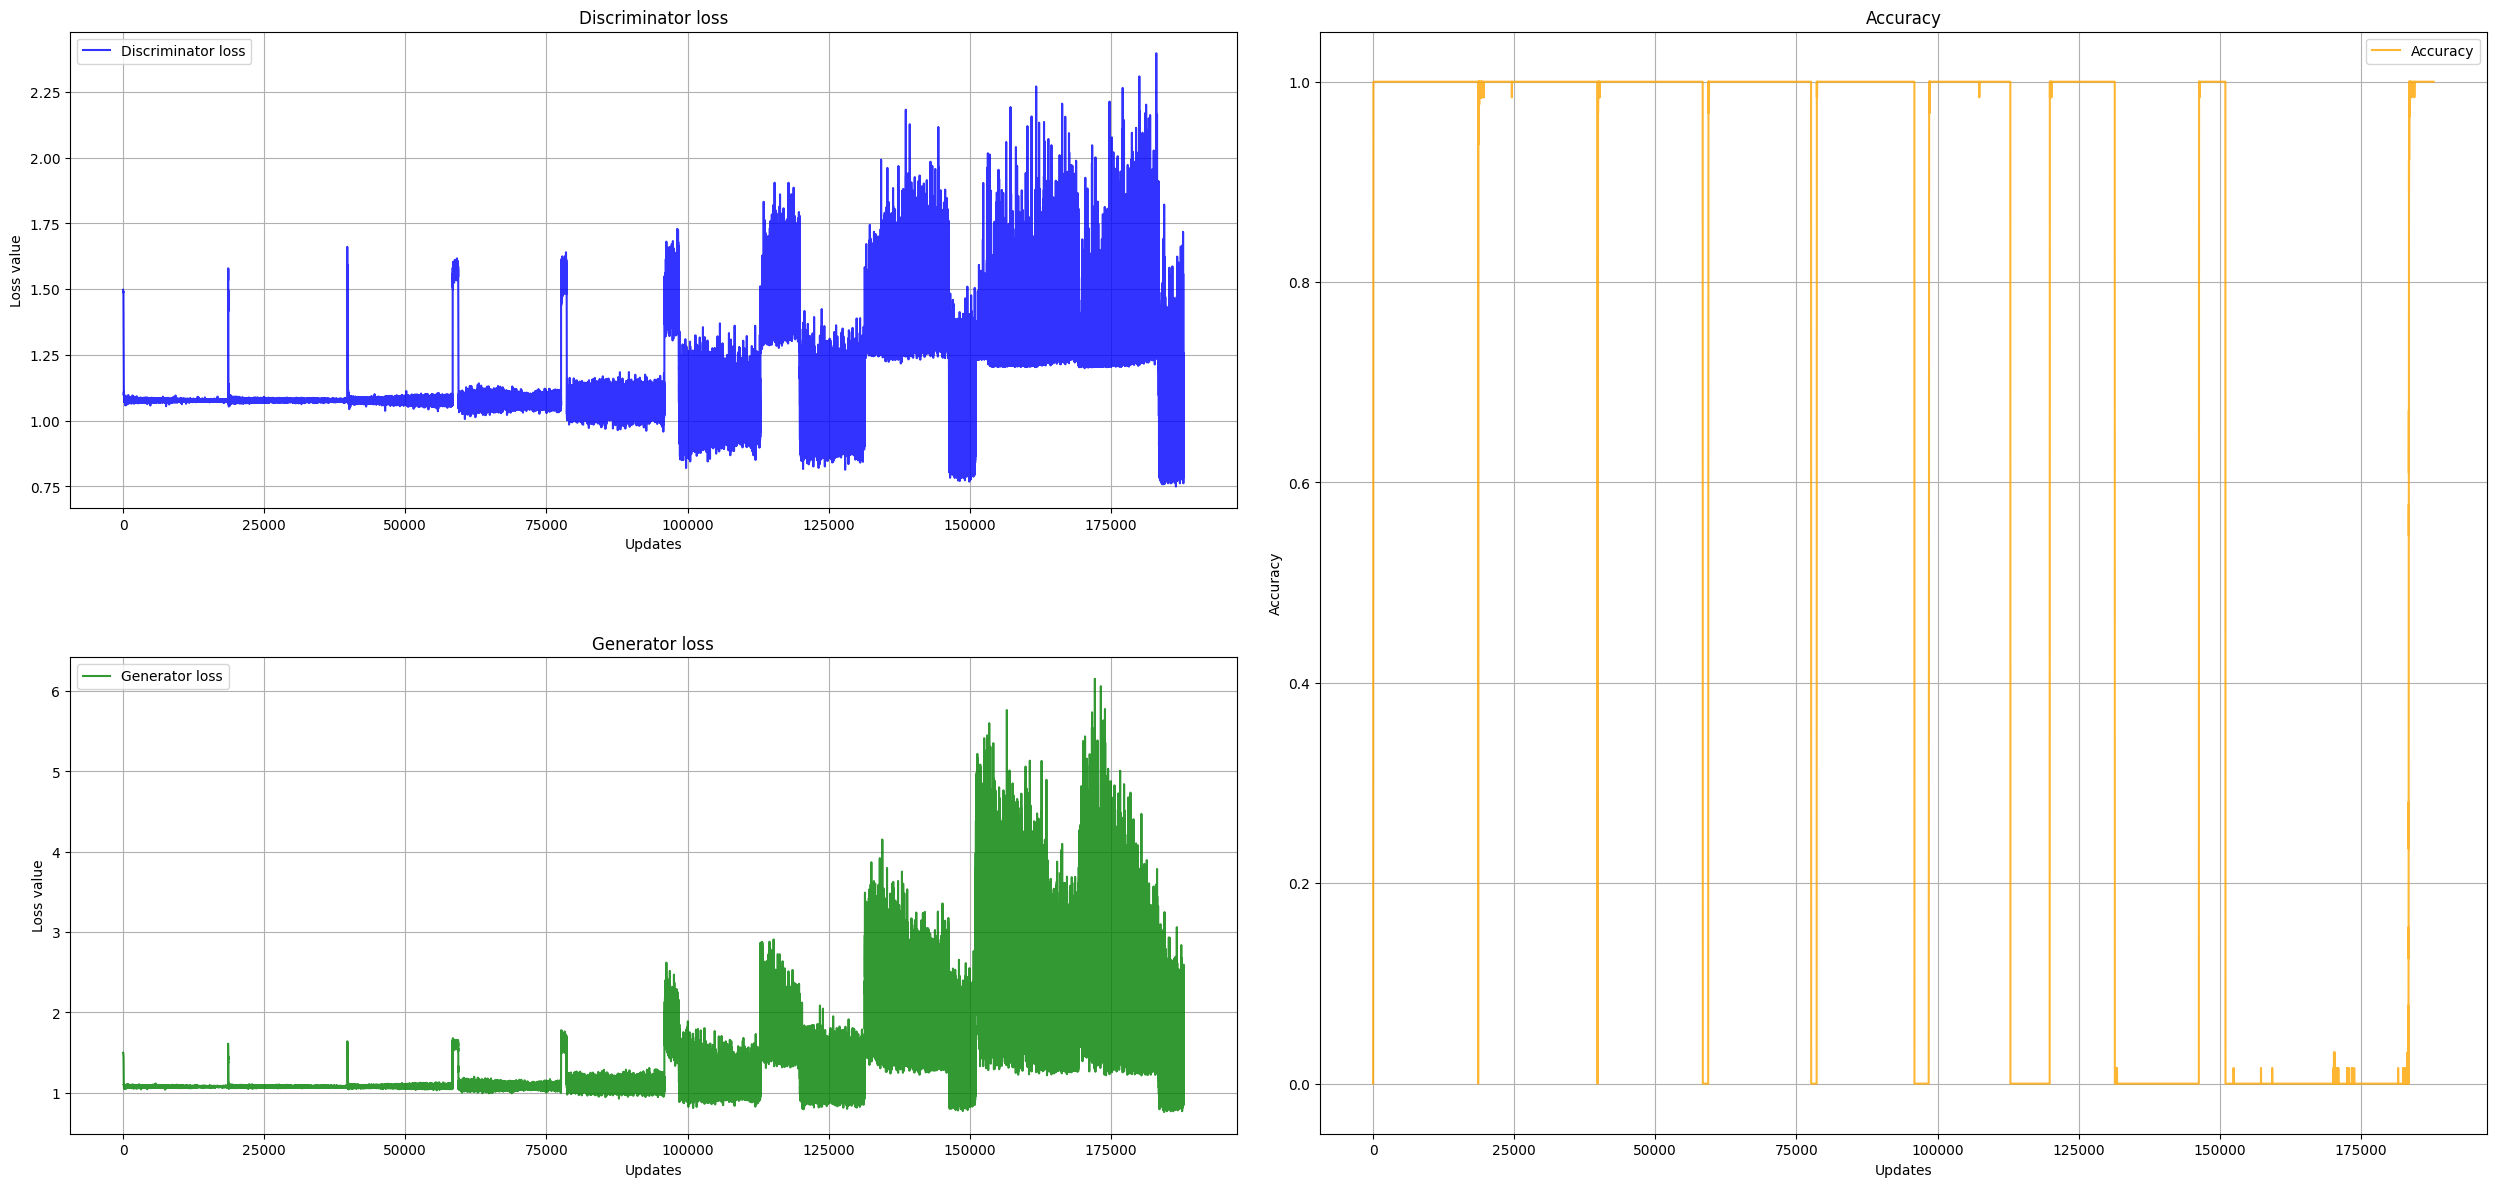

In [8]:
plot_history(history)

## Evaluate the architecture
Since the model gets only one digit for each experience, in the last one, the network collapses the entire latent space into the last digit seen.

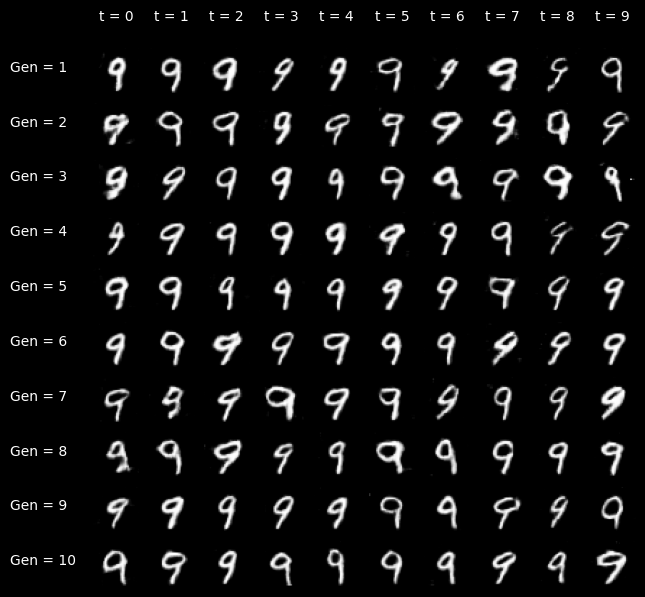

In [9]:
generate_classes(trainer.generator, config["num_classes"], rows=10, device=config["device"])